### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

# To avoid encoding error, use 'unicode_escape'

In [3]:
# checking the shape of dataframe

df.shape

(11251, 15)

In [4]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
# displaying the columns and type of information it stores

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Inspecting the information above, we see that the 'Status' and 'unnamed1' columns have no data stored in them

# These two columns can be dropped off as they have no relevant significance for further analysis

df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
# checking that the columns have been dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
# Displaying the columns and null values that are present in the respective columns
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Null value in 'Amount' means that the customer did not make any purchase

# Hence these rows can be dropped off

df.dropna(inplace = True) #drops the row where at least one element is missing

In [10]:
pd.isnull(df).sum()

# No null values are present

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Changing the datatype of 'Amount' from float to int

df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtypes

dtype('int32')

In [12]:
# describe() method returns the description of the data in the dataframe (eg: count, min, max, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

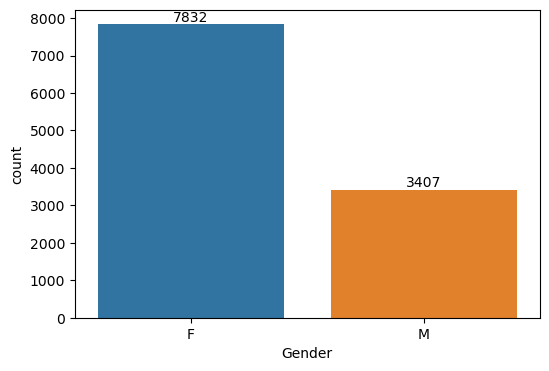

In [13]:
# Total number of males and females

plt.figure(figsize = (6,4))
gender_plot = sns.countplot(x = 'Gender', data = df, hue = 'Gender')

for bars in gender_plot.containers:
    gender_plot.bar_label(bars)

plt.show()

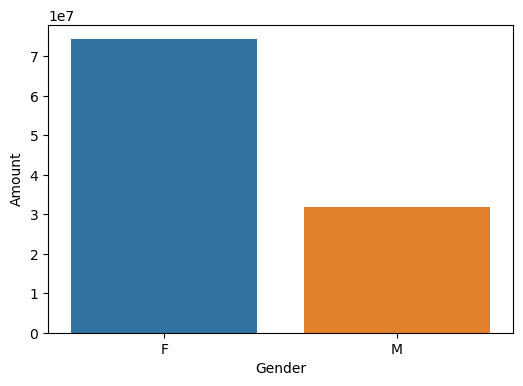

In [14]:
# Seeing which gender has spent more on festival shopping

# Grouping the genders and storing their total sales amount that was spent

sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.figure(figsize = (6,4))
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gender, hue = 'Gender')
plt.show()

##### From the above graphs, we can observe that most of the buyers are females and females thave more purchasing power than men.

### Age

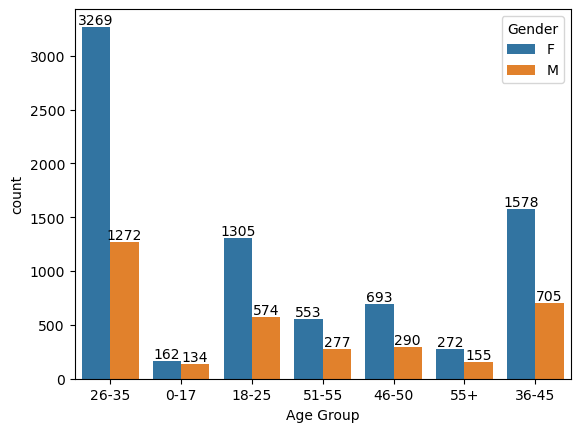

In [15]:
# Total number of consumers in each age group

agegroup_plot = sns.countplot(x='Age Group', data = df, hue = 'Gender')

for bars in agegroup_plot.containers:
    agegroup_plot.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

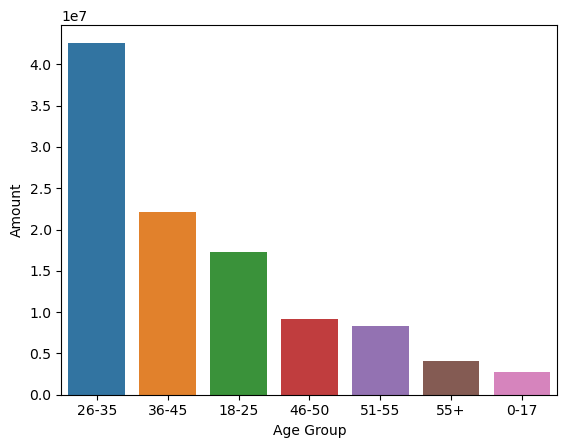

In [16]:
# Seeing which age group has spent more on shopping

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount', hue = 'Age Group')

##### From above graphs, we can see that most of the buyers are of age group between 26-35 yrs which are mostly female.

### State

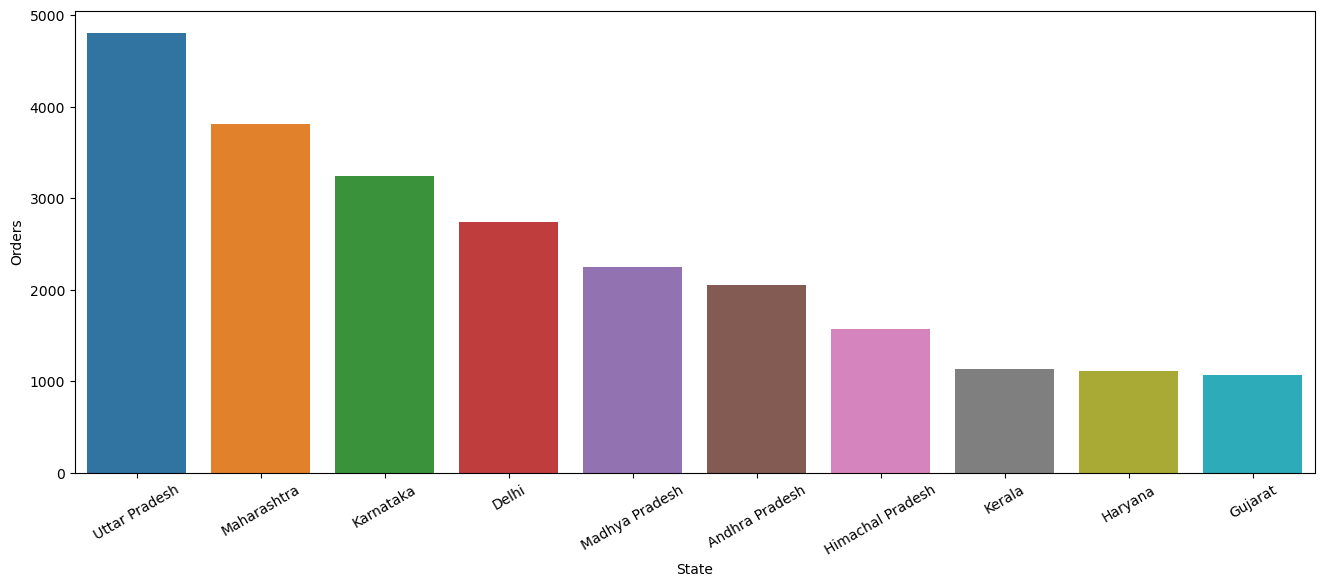

In [17]:
# Total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize = (16,6))
sns.barplot(data=sales_state, x='State', y='Orders', hue='State')
plt.xticks(rotation = 30)
plt.show()

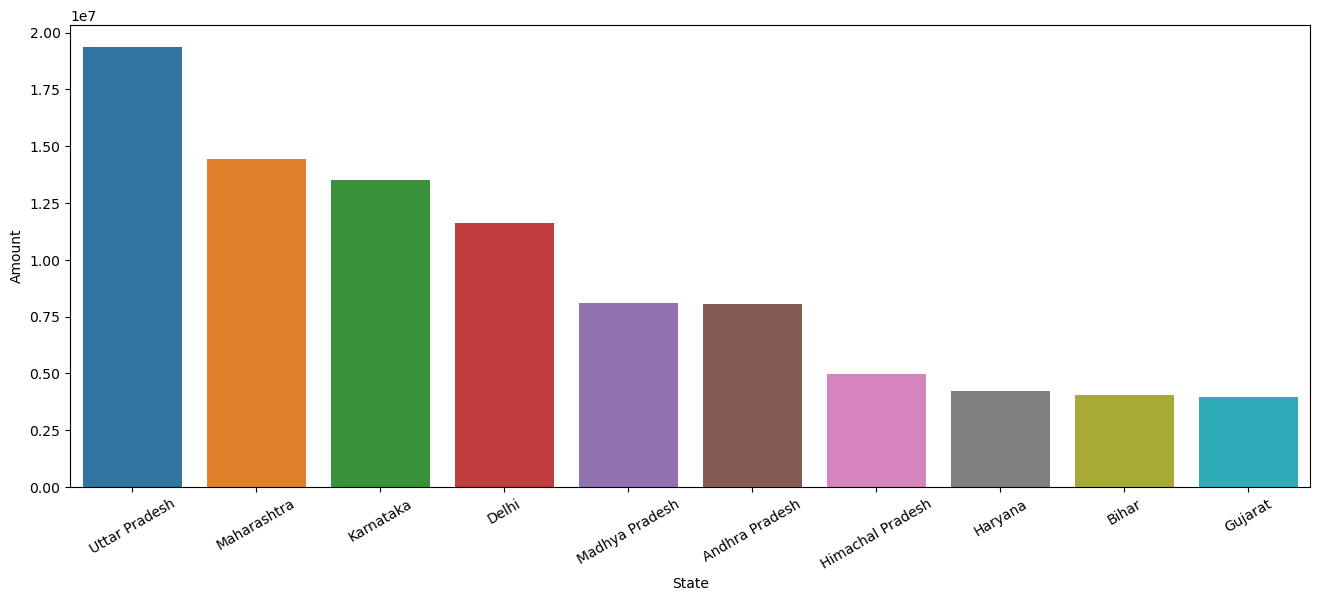

In [18]:
# Total Amount spent by top 10 states

sales_state_order = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize = (16,6))
sns.barplot(data = sales_state_order, x = 'State', y = 'Amount', hue = 'State')
plt.xticks(rotation = 30)
plt.show()

##### From above graphs, we can see that most number of orders & total amount spent are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

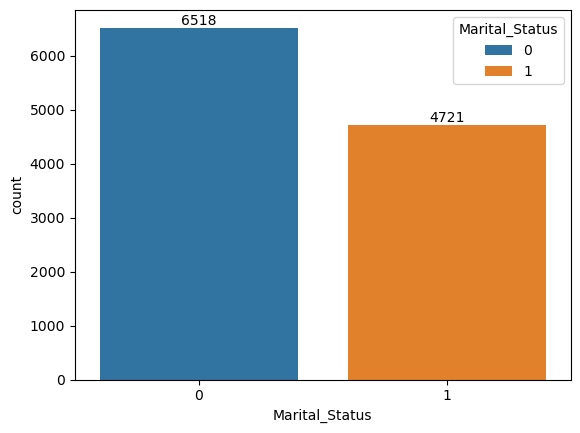

In [19]:
# Plotting Number of married and unmarried people where married=0 and unmarried=1

marriage_plot = sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status')

for bar in marriage_plot.containers:
    marriage_plot.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

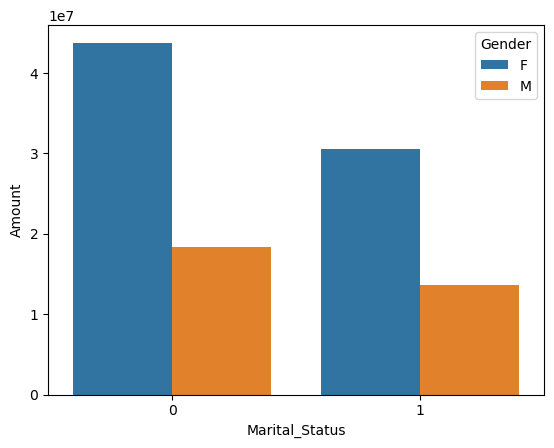

In [20]:
# Grouping by Marital_Status and Gender and finding the total amount spent on sales

sales_total = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

sns.barplot(data = sales_total, x='Marital_Status', y='Amount', hue='Gender')

##### From above graphs, we can see that most of the buyers are married (women) who have high purchasing power

### Occupation

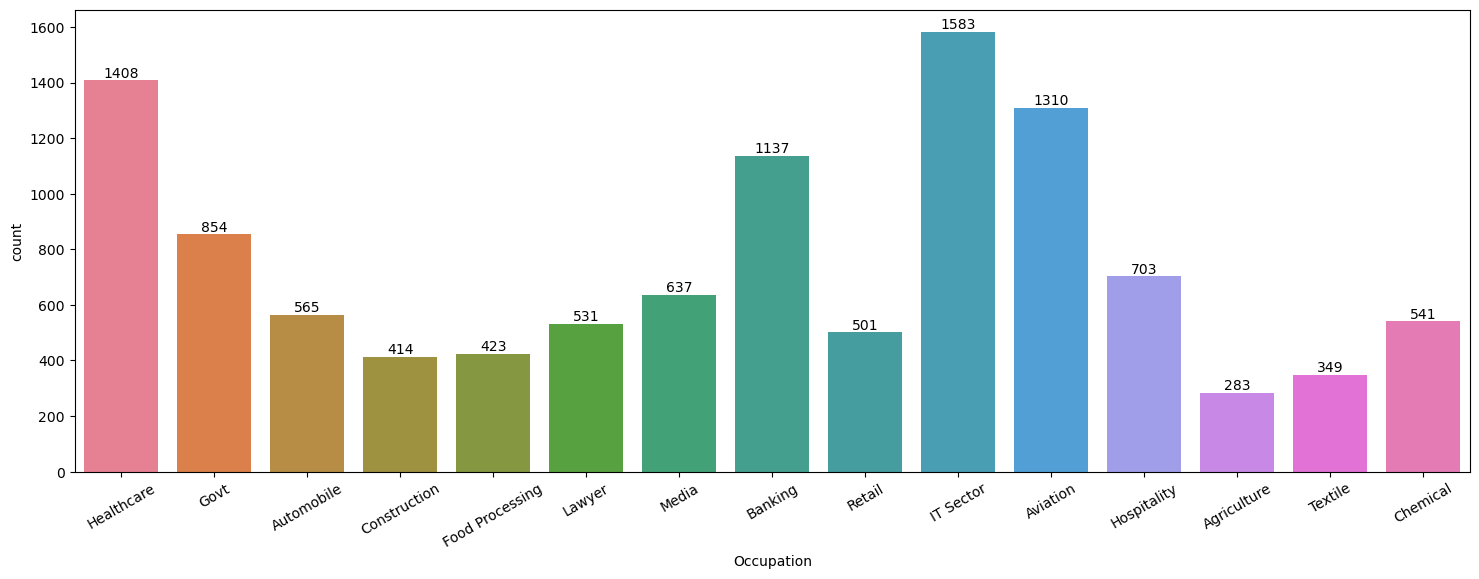

In [21]:
# Displaying the total number of people that have a particular occupation

plt.figure(figsize = (18,6))
sales_occ = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')

for bar in sales_occ.containers:
    sales_occ.bar_label(bar)
plt.xticks(rotation = 30)
plt.show()

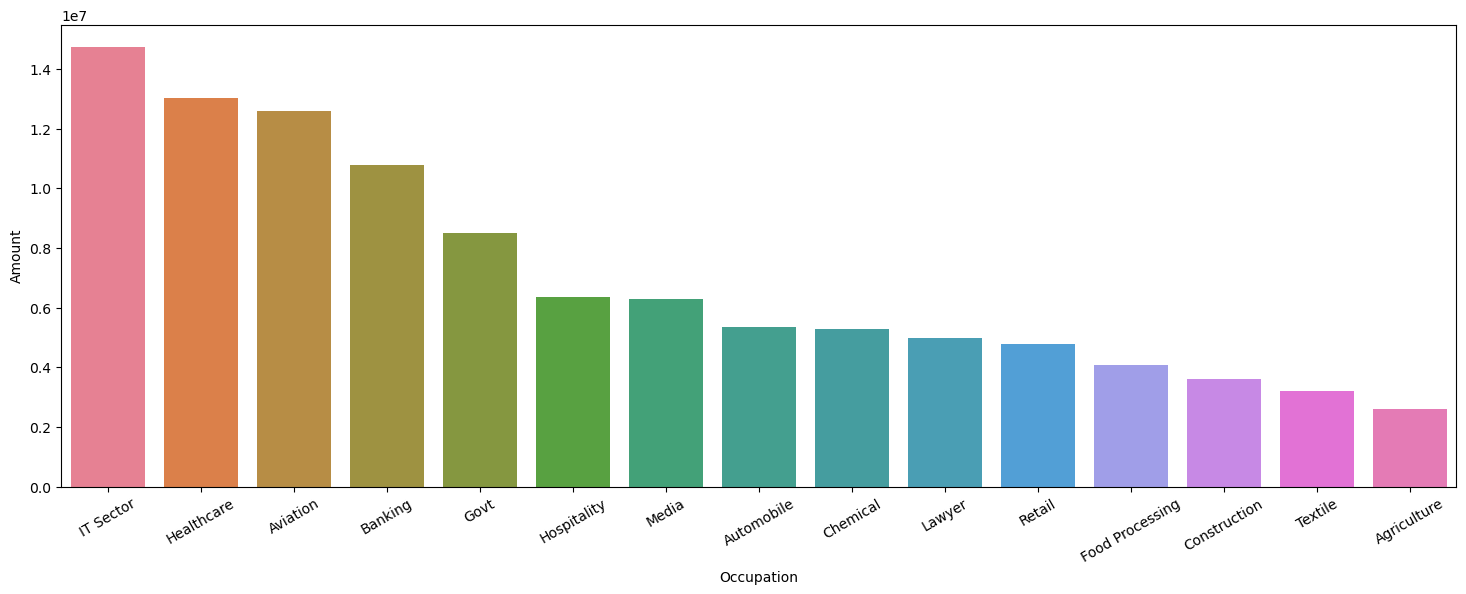

In [22]:
# Grouping by Occupation to find the total amount spent by people working in each occupation

sales_total = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize = (18,6))
sns.barplot(data = sales_total, x = 'Occupation', y = 'Amount', hue = 'Occupation')
plt.xticks(rotation = 30)
plt.show()

##### From above graphs, we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

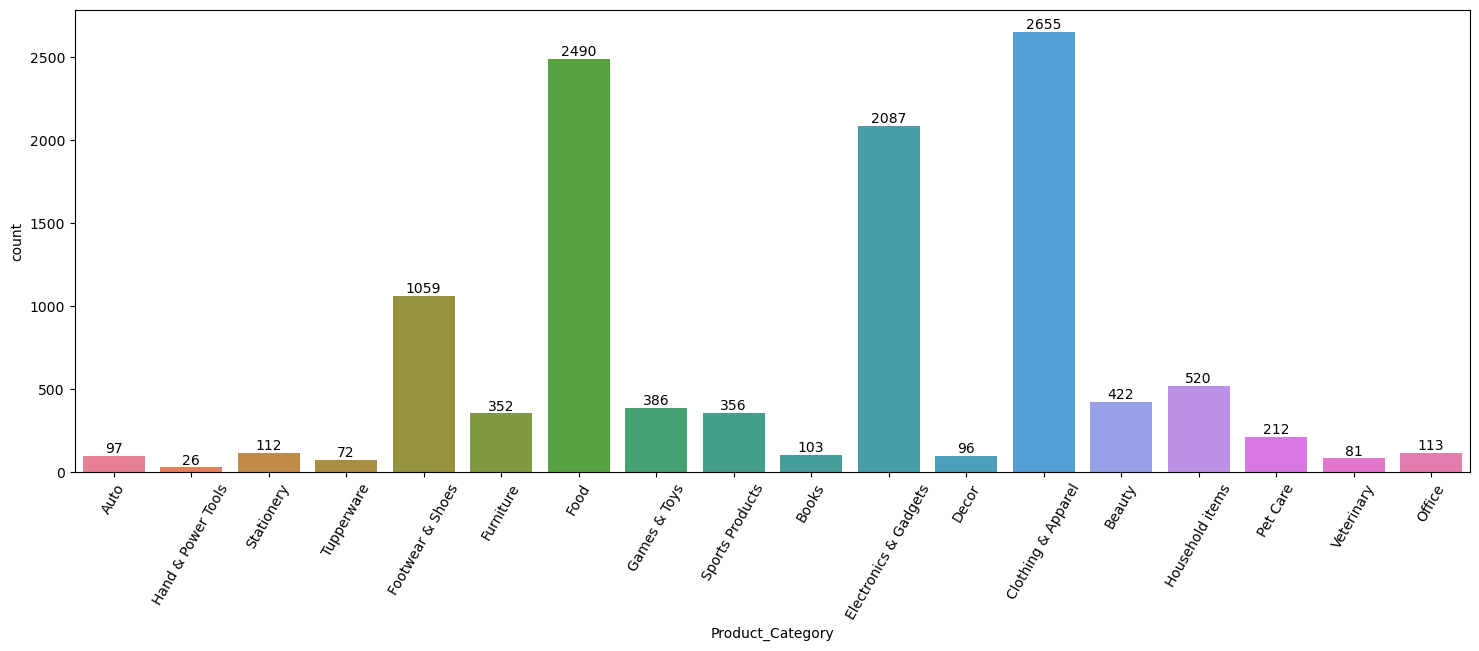

In [23]:
plt.figure(figsize = (18,6))

sales_pro = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')

for bar in sales_pro.containers:
    sales_pro.bar_label(bar)
plt.xticks(rotation = 60)
plt.show()

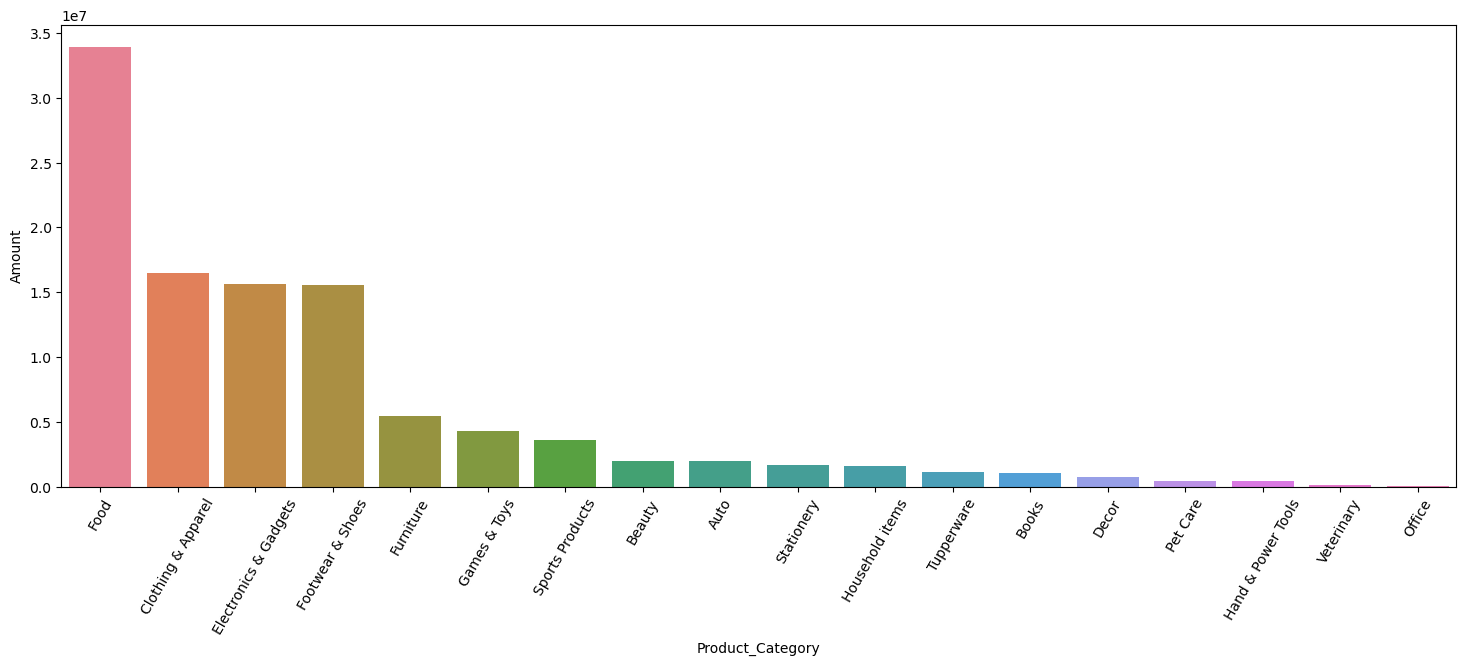

In [24]:
# Grouping by Product_Category to find the total amount spent by people on each category

sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize = (18,6))
sns.barplot(data = sales_cat, x = 'Product_Category', y = 'Amount', hue = 'Product_Category')
plt.xticks(rotation = 60)
plt.show()

##### From above graphs, we can see that most selling products are from Food, Clothing and Electronics category

### Largest selling product

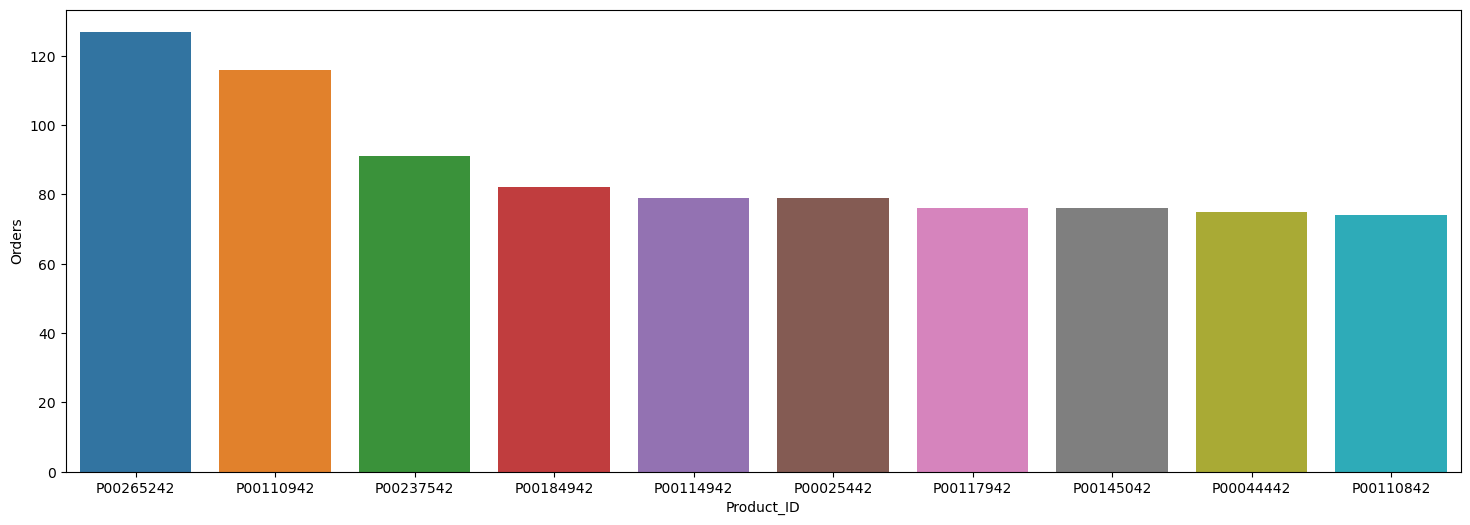

In [25]:
# Grouping the products with same Product_ID together to get their total number of orders placed

most_sales = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize = (18,6))
sns.barplot(data = most_sales, x='Product_ID', y='Orders', hue = 'Product_ID')
plt.show()

##### Product with product_ID P00265242 was the largest selling product

### Conclusions:

##### - Married women in the age group 26-35 yrs, from UP, Maharastra and Karnataka who mostly work in the IT, Healthcare and Aviation sectors are more likely to buy products from Food, Clothing and Electronics category

##### - The market should focus on making more products that are appealing to the above group of consumers in order to increase their profits in the future festival seasons